# HW2/Final Project Template: Dataset Overview and Use Case Examples
## EDS 220, Fall 2022

The following is a template you can use for constructing your draft Jupyter notebooks demonstrating the features and use case examples for your chosen environmental datasets. I've included sections addressing the major themes that should be included, but there is also room for customization as well. 

Many of the resources provided are adapted from this template guide to notebook creation built for the "EarthCube" project:
https://github.com/earthcube/NotebookTemplates

## Exploring the estimated annual loss due to natural hazards across the US

Replace the above with your chosen title. This should include some indication of the dataset you chose, but can also include a 'team title' or short summary of the themes of your analysis. Possible examples might be something like:
- ERSSTv5 Sea Surface Temperature 
- National Land Cover Database Overview

## Authors

- Alex Reed, MEDS, UC Santa Barbara (areed@ucsb.edu)<br>
- Erica Dale, MEDS, UC Santa Barbara (ericadale@ucsb.edu)<br>
- Michelle Lam, MEDS, UC Santa Barbara (michellelam@ucsb.edu) <br>
- Wen-Tien Wang, MESM, UC Santa Barbara (wentien@ucsb.edu)

## Table of Contents

Include a summary of the various sections included in your notebook, so that users can easily skip to a section of interest. It's also good to include hyperlinks to the different sections, so that clicking on the heading sends one to that section directly. Examples are below; see also this handy guide to adding hyperlinks to Jupyter notebooks:
https://medium.illumidesk.com/jupyter-notebook-little-known-tricks-b0866a558017

The major sections you'll need for HW2 - and your group project - are shown below:

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Create Binder Environment](#binder)

[7. References](#references)

<a id='purpose'></a> 
### Purpose
The purpose of this notebook is to assess the estimated annual loss affecting the states in the United States. 

The National Risk Index (NRI) is a dataset and online tool to help illustrate the US communities most at risk for 18 natural hazards. It serves as a useful tool for planners and emergency managers at the local, regional, state, and federal levels, as well as other decision makers and interested members of the general public. With improved understanding of natural hazard risk, communities can take action to reduce the risk specific to that community. The NRI was designed and built by FEMA in close collaboration with various stakeholders and partners in academia; local, state and federal government; and private industry. 

<a id='overview'></a> 
### Dataset Description

The National Risk Index (NRI) is a dataset and online tool to help illustrate the US communities most at risk for 18 natural hazards. It serves as a useful tool for planners and emergency managers at the local, regional, state, and federal levels, as well as other decision makers and interested members of the general public. With improved understanding of natural hazard risk, communities can take action to reduce the risk specific to that community. The NRI was designed and built by FEMA in close collaboration with various stakeholders and partners in academia; local, state and federal government; and private industry. 

This portion of the notebook should contain a summary description of your chosen environmental dataset. In a few paragraphs, discuss:
- The creators of the dataset: NASA/NOAA/other government agency? Nonprofit? etc.
- Major characteristics of the dataset: global coverage? Spatial resolution? Temporal resolution? Creation date? 
- The file format(s) used to store the data: netCDF? CSV? Other?
- The source/archive you will be using to retrieve the data: Google Earth Engine? Agency data portal? Other API?
- Any known issues with data quality that might be expected to impact the results

Include links to any external resources needed to access the data here, including either the location of files stored on an external server you've set up or the access URL for a pre-existing repository. You can also include any example images you find useful for motivating the choice of dataset (optional).

**Here and throughout the notebook:** use a mix of markdown cells and code blocks to demonstrate your code. Markdown cells should be used to describe the purpose of the code blocks which follow them, but _do not replace_ comments within the code block! Make sure to include comments in the code as well illustrating the specific function of the various lines of code. Your later self - and other users - will thank you!

<a id='io'></a> 
### Dataset Input/Output 

1) Import all necessary packages 

In [9]:
import geopandas as gpd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import pandas as pd

2) Set any parameters that will be needed during subsequent portions of the notebook. Typical examples of parameters include:
- names of any directories where data are stored
- ranges of years over which data are valid
- any thresholds or latitude/longitude ranges to be used later (e.g. dimensions of NINO3.4 region, threshold SSTA values for El Nino, etc.)

#filter of our columns 

3) Read in the data! If the data files are very large, you may want to consider subsetting the portion of files to be read in (see examples of this during notebooks provided in Weeks 7 and 8).

In [10]:
url = 'https://hazards.fema.gov/nri/Content/StaticDocuments/DataDownload//NRI_Shapefile_States/NRI_Shapefile_States.zip'

local_path = 'data/'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path=local_path) # extract to folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

Done
['NRI_Shapefile_States.dbf', 'NRI_Shapefile_States.prj', 'NRI_Shapefile_States.shp', 'NRI_Shapefile_States.shx']


In [11]:
df = gpd.read_file("data/NRI_Shapefile_States.shp")

<a id='display'></a> 
### Metadata Display and Basic Visualization

Next, provide some example commands to take a quick look at what is in your dataset. We've done some things along these lines in class by now, but you should include at least one of:

- Metadata display: commands to indicate a) which variables are included in the dataset and their names; b) coordinate information associated with the data variables; c) other important metadata parameters (site names, etc); and d) any important information on missing data
- Basic visualization: a "quick and dirty" plot showing generally what the data look like. Depending on your dataset, this could be either a time series or a map (no fancy coordinate reference system/projection needed yet).

<a id='display'></a> 
#### Metadata from Federal Emergency Management Agency website

In [12]:
# let's check out our data
df.head()

,NRI_ID,STATE,STATEABBRV,STATEFIPS,POPULATION,BUILDVALUE,AGRIVALUE,AREA,EAL_SCORE,EAL_RATNG,...,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,NRI_VER,Shape_Leng,Shape_Area,geometry
0,S01,Alabama,AL,01,4779736,5.026065e+11,5.880985e+09,50646.710241,34.608908,Relatively Moderate,...,0.234974,1.785802e+06,11589.311425,1.971288e+06,38.620314,Relatively Low,November 2021,2.745843e+06,1.899438e+11,"MULTIPOLYGON (((-9804956.966 3536018.071, -980..."
1,S02,Alaska,AK,02,710231,9.066546e+10,7.045900e+07,570885.873384,16.044408,Relatively Low,...,0.075262,5.719919e+05,257.114671,5.809260e+05,25.326769,Very Low,November 2021,1.233706e+08,8.140880e+12,"MULTIPOLYGON (((-19938160.593 6674746.261, -19..."
2,S04,Arizona,AZ,04,6392017,6.314331e+11,2.548788e+09,113590.691628,25.714888,Relatively Moderate,...,0.079516,6.043239e+05,0.002481,6.113015e+05,25.779855,Very Low,November 2021,2.908335e+06,4.340547e+11,"POLYGON ((-12695995.017 4439134.170, -12694655..."
3,S05,Arkansas,AR,05,2915918,2.909845e+11,9.434198e+09,52034.233206,33.859489,Relatively Moderate,...,0.193497,1.470578e+06,565004.577209,1.153451e+07,70.488631,Relatively High,November 2021,2.656502e+06,2.053261e+11,"POLYGON ((-9989043.095 4300705.950, -9989037.1..."
4,S06,California,CA,06,37253956,3.848852e+12,2.885307e+10,155785.663611,100.000000,Very High,...,0.080550,6.121814e+05,0.023056,6.384323e+05,26.172018,Very Low,November 2021,7.112658e+06,6.496194e+11,"MULTIPOLYGON (((-13048004.308 3865271.303, -13..."


/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


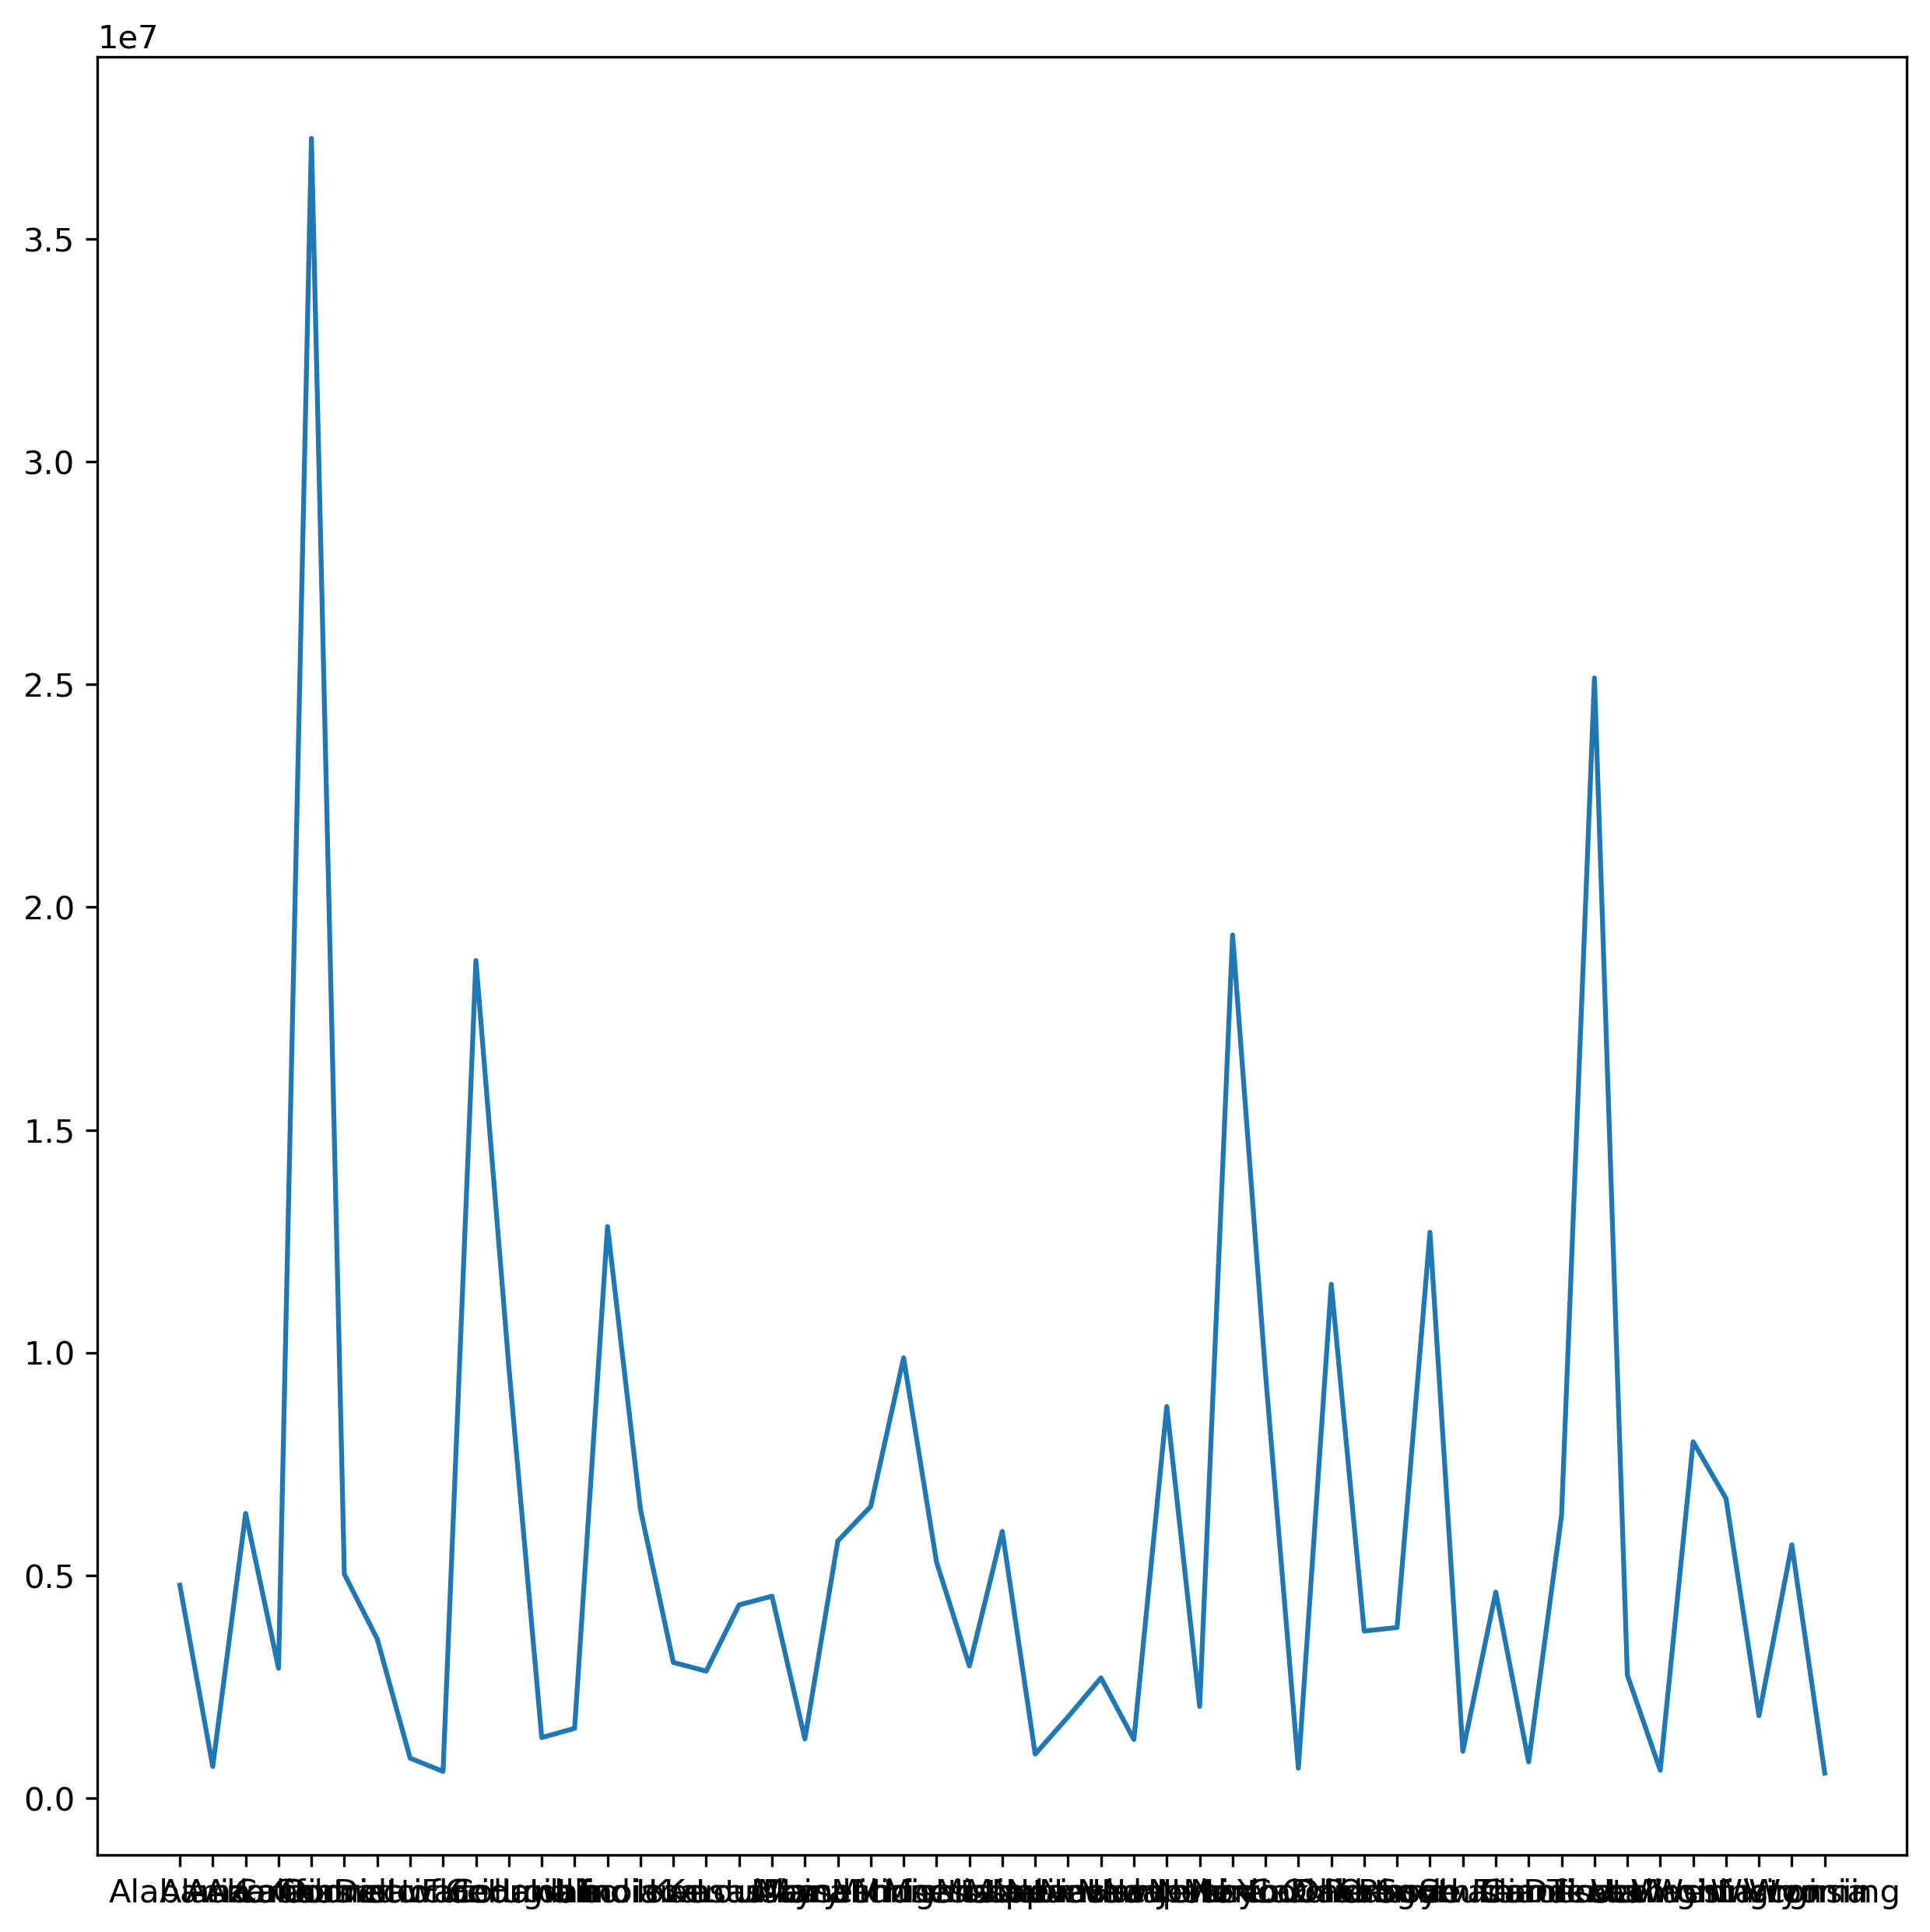

In [13]:
# population


plt.figure(figsize=(10, 10), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(df['STATE'],df['POPULATION']) 

In [41]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
df.head()

,NRI_ID,STATE,STATEABBRV,STATEFIPS,POPULATION,BUILDVALUE,AGRIVALUE,AREA,EAL_SCORE,EAL_RATNG,EAL_NPCTL,EAL_VALT,EAL_VALB,EAL_VALP,EAL_VALPE,EAL_VALA,AVLN_EVNTS,AVLN_EXPB,AVLN_EXPP,AVLN_EXPPE,AVLN_EXPT,AVLN_EALB,AVLN_EALP,AVLN_EALPE,AVLN_EALT,AVLN_EALS,AVLN_EALR,CFLD_EVNTS,CFLD_EXPB,CFLD_EXPP,CFLD_EXPPE,CFLD_EXPT,CFLD_EALB,CFLD_EALP,CFLD_EALPE,CFLD_EALT,CFLD_EALS,CFLD_EALR,CWAV_EVNTS,CWAV_EXPB,CWAV_EXPP,CWAV_EXPPE,CWAV_EXPA,CWAV_EXPT,CWAV_EALB,CWAV_EALP,CWAV_EALPE,CWAV_EALA,CWAV_EALT,CWAV_EALS,CWAV_EALR,DRGT_EVNTS,DRGT_EXPA,DRGT_EXPT,DRGT_EALA,DRGT_EALT,DRGT_EALS,DRGT_EALR,ERQK_EVNTS,ERQK_EXPB,ERQK_EXPP,ERQK_EXPPE,ERQK_EXPT,ERQK_EALB,ERQK_EALP,ERQK_EALPE,ERQK_EALT,ERQK_EALS,ERQK_EALR,HAIL_EVNTS,HAIL_EXPB,HAIL_EXPP,HAIL_EXPPE,HAIL_EXPA,HAIL_EXPT,HAIL_EALB,HAIL_EALP,HAIL_EALPE,HAIL_EALA,HAIL_EALT,HAIL_EALS,HAIL_EALR,HWAV_EVNTS,HWAV_EXPB,HWAV_EXPP,HWAV_EXPPE,HWAV_EXPA,HWAV_EXPT,HWAV_EALB,HWAV_EALP,HWAV_EALPE,HWAV_EALA,HWAV_EALT,HWAV_EALS,HWAV_EALR,HRCN_EVNTS,HRCN_EXPB,HRCN_EXPP,HRCN_EXPPE,HRCN_EXPA,HRCN_EXPT,HRCN_EALB,HRCN_EALP,HRCN_EALPE,HRCN_EALA,HRCN_EALT,HRCN_EALS,HRCN_EALR,ISTM_EVNTS,ISTM_EXPB,ISTM_EXPP,ISTM_EXPPE,ISTM_EXPT,ISTM_EALB,ISTM_EALP,ISTM_EALPE,ISTM_EALT,ISTM_EALS,ISTM_EALR,LNDS_EVNTS,LNDS_EXPB,LNDS_EXPP,LNDS_EXPPE,LNDS_EXPT,LNDS_EALB,LNDS_EALP,LNDS_EALPE,LNDS_EALT,LNDS_EALS,LNDS_EALR,LTNG_EVNTS,LTNG_EXPB,LTNG_EXPP,LTNG_EXPPE,LTNG_EXPT,LTNG_EALB,LTNG_EALP,LTNG_EALPE,LTNG_EALT,LTNG_EALS,LTNG_EALR,RFLD_EVNTS,RFLD_EXPB,RFLD_EXPP,RFLD_EXPPE,RFLD_EXPA,RFLD_EXPT,RFLD_EALB,RFLD_EALP,RFLD_EALPE,RFLD_EALA,RFLD_EALT,RFLD_EALS,RFLD_EALR,SWND_EVNTS,SWND_EXPB,SWND_EXPP,SWND_EXPPE,SWND_EXPA,SWND_EXPT,SWND_EALB,SWND_EALP,SWND_EALPE,SWND_EALA,SWND_EALT,SWND_EALS,SWND_EALR,TRND_EVNTS,TRND_EXPB,TRND_EXPP,TRND_EXPPE,TRND_EXPA,TRND_EXPT,TRND_EALB,TRND_EALP,TRND_EALPE,TRND_EALA,TRND_EALT,TRND_EALS,TRND_EALR,TSUN_EVNTS,TSUN_EXPB,TSUN_EXPP,TSUN_EXPPE,TSUN_EXPT,TSUN_EALB,TSUN_EALP,TSUN_EALPE,TSUN_EALT,TSUN_EALS,TSUN_EALR,VLCN_EVNTS,VLCN_EXPB,VLCN_EXPP,VLCN_EXPPE,VLCN_EXPT,VLCN_EALB,VLCN_EALP,VLCN_EALPE,VLCN_EALT,VLCN_EALS,VLCN_EALR,WFIR_EVNTS,WFIR_EXPB,WFIR_EXPP,WFIR_EXPPE,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALPE,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_EALR,WNTW_EVNTS,WNTW_EXPB,WNTW_EXPP,WNTW_EXPPE,WNTW_EXPA,WNTW_EXPT,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,NRI_VER,Shape_Leng,Shape_Area,geometry
0,S01,Alabama,AL,01,4779736,5.03e+11,5.88e+09,50646.71,34.61,Relatively Moderate,68.63,5.47e+08,2.82e+08,27.86,2.12e+08,5.30e+07,-9999.0,-1.00e+04,-9999.0,-1.00e+04,-1.00e+04,-9999.00,-1.00e+04,-1.00e+04,-1.00e+04,-9999.00,Not Applicable,-9999.0,1.51e+10,1.01e+05,7.68e+11,7.83e+11,14663.21,1.57e-01,1.19e+06,1.21e+06,13.52,Relatively Low,11.0,1.09e+11,1.02e+06,7.72e+12,2.13e+09,7.84e+12,8566.12,2.05e-01,1.56e+06,1.36e+06,2.93e+06,41.66,Relatively Low,1904.0,5.12e+09,5.12e+09,4.22e+07,4.22e+07,32.01,Relatively Moderate,-9999.0,5.03e+11,4.78e+06,3.63e+13,3.68e+13,2.00e+07,0.32,2.42e+06,2.24e+07,14.98,Relatively Low,106.0,5.03e+11,4.78e+06,3.63e+13,5.88e+09,3.68e+13,1.95e+06,1.28e-01,973770.92,1.51e+05,3.07e+06,16.98,Relatively Low,24.0,5.02e+11,4.78e+06,3.63e+13,5.88e+09,3.68e+13,97.83,1.94,1.47e+07,2.12e+04,1.47e+07,40.43,Relatively Moderate,87.0,5.01e+11,4.76e+06,3.62e+13,5.83e+09,3.67e+13,9.73e+07,1.50e-01,1.14e+06,8.39e+06,1.07e+08,40.48,Relatively Moderate,30.0,5.02e+11,4.77e+06,3.63e+13,3.68e+13,1.01e+06,1.01e-01,7.67e+05,1.78e+06,27.18,Relatively Low,12.0,2.10e+11,2.11e+06,1.60e+13,1.62e+13,8.27e+05,0.39,2.99e+06,3.81e+06,38.12,Relatively Moderate,1973.0,5.03e+11,4.78e+06,3.63e+13,3.68e+13,1.16e+06,2.03,1.54e+07,1.66e+07,50.40,Relatively High,-9999.0,2.84e+10,2.29e+05,1.74e+12,4.87e+08,1.77e+12,5.33e+07,3.13,2.38e+07,3.28e+05,7.74e+07,30.90,Relatively Moderate,76.0,5.03e+11,4.78e+06,3.63e+13,5.88e+09,3.68e+13,6.74e+06,1.47e+00,1.12e+07,205033.61,1.81e+07,56.87,Relatively Moderate,1518.0,5.03e+11,4.78e+06,3.63e+13,5.88e+09,3.68e+13,9.58e+07,1.75e+01,1.33e+08,330074.60,2.30e+08,6.45e+01,Relatively High,-9999.0,-

In [15]:
df.describe()

,POPULATION,BUILDVALUE,AGRIVALUE,AREA,EAL_SCORE,EAL_NPCTL,EAL_VALT,EAL_VALB,EAL_VALP,EAL_VALPE,EAL_VALA,AVLN_EVNTS,AVLN_EXPB,AVLN_EXPP,AVLN_EXPPE,AVLN_EXPT,AVLN_EALB,AVLN_EALP,AVLN_EALPE,AVLN_EALT,AVLN_EALS,CFLD_EVNTS,CFLD_EXPB,CFLD_EXPP,CFLD_EXPPE,CFLD_EXPT,CFLD_EALB,CFLD_EALP,CFLD_EALPE,CFLD_EALT,CFLD_EALS,CWAV_EVNTS,CWAV_EXPB,CWAV_EXPP,CWAV_EXPPE,CWAV_EXPA,CWAV_EXPT,CWAV_EALB,CWAV_EALP,CWAV_EALPE,CWAV_EALA,CWAV_EALT,CWAV_EALS,DRGT_EVNTS,DRGT_EXPA,DRGT_EXPT,DRGT_EALA,DRGT_EALT,DRGT_EALS,ERQK_EVNTS,ERQK_EXPB,ERQK_EXPP,ERQK_EXPPE,ERQK_EXPT,ERQK_EALB,ERQK_EALP,ERQK_EALPE,ERQK_EALT,ERQK_EALS,HAIL_EVNTS,HAIL_EXPB,HAIL_EXPP,HAIL_EXPPE,HAIL_EXPA,HAIL_EXPT,HAIL_EALB,HAIL_EALP,HAIL_EALPE,HAIL_EALA,HAIL_EALT,HAIL_EALS,HWAV_EVNTS,HWAV_EXPB,HWAV_EXPP,HWAV_EXPPE,HWAV_EXPA,HWAV_EXPT,HWAV_EALB,HWAV_EALP,HWAV_EALPE,HWAV_EALA,HWAV_EALT,HWAV_EALS,HRCN_EVNTS,HRCN_EXPB,HRCN_EXPP,HRCN_EXPPE,HRCN_EXPA,HRCN_EXPT,HRCN_EALB,HRCN_EALP,HRCN_EALPE,HRCN_EALA,HRCN_EALT,HRCN_EALS,ISTM_EVNTS,ISTM_EXPB,ISTM_EXPP,ISTM_EXPPE,ISTM_EXPT,ISTM_EALB,ISTM_EALP,ISTM_EALPE,ISTM_EALT,ISTM_EALS,LNDS_EVNTS,LNDS_EXPB,LNDS_EXPP,LNDS_EXPPE,LNDS_EXPT,LNDS_EALB,LNDS_EALP,LNDS_EALPE,LNDS_EALT,LNDS_EALS,LTNG_EVNTS,LTNG_EXPB,LTNG_EXPP,LTNG_EXPPE,LTNG_EXPT,LTNG_EALB,LTNG_EALP,LTNG_EALPE,LTNG_EALT,LTNG_EALS,RFLD_EVNTS,RFLD_EXPB,RFLD_EXPP,RFLD_EXPPE,RFLD_EXPA,RFLD_EXPT,RFLD_EALB,RFLD_EALP,RFLD_EALPE,RFLD_EALA,RFLD_EALT,RFLD_EALS,SWND_EVNTS,SWND_EXPB,SWND_EXPP,SWND_EXPPE,SWND_EXPA,SWND_EXPT,SWND_EALB,SWND_EALP,SWND_EALPE,SWND_EALA,SWND_EALT,SWND_EALS,TRND_EVNTS,TRND_EXPB,TRND_EXPP,TRND_EXPPE,TRND_EXPA,TRND_EXPT,TRND_EALB,TRND_EALP,TRND_EALPE,TRND_EALA,TRND_EALT,TRND_EALS,TSUN_EVNTS,TSUN_EXPB,TSUN_EXPP,TSUN_EXPPE,TSUN_EXPT,TSUN_EALB,TSUN_EALP,TSUN_EALPE,TSUN_EALT,TSUN_EALS,VLCN_EVNTS,VLCN_EXPB,VLCN_EXPP,VLCN_EXPPE,VLCN_EXPT,VLCN_EALB,VLCN_EALP,VLCN_EALPE,VLCN_EALT,VLCN_EALS,WFIR_EVNTS,WFIR_EXPB,WFIR_EXPP,WFIR_EXPPE,WFIR_EXPA,WFIR_EXPT,WFIR_EALB,WFIR_EALP,WFIR_EALPE,WFIR_EALA,WFIR_EALT,WFIR_EALS,WNTW_EVNTS,WNTW_EXPB,WNTW_EXPP,WNTW_EXPPE,WNTW_EXPA,WNTW_EXPT,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,Shape_Leng,Shape_Area
count,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,51.00,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,51.00,5.10e+01,51.00,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,5.10e+01,51.00,51.0,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.0,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,51.00,51.0,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,51.00,5.10e+01,51.00,5.10e+01,5.10e+01,5.10e+01,51.00,51.00,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,5.10e+01,51.00,51.0,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,51.00,51.00,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,5.10e+01,51.00,5.10e+01,51.00,5.10e+01,5.10e+01
mean,6.05e+06,6.94e+11,7.20e+09,69261.06,29.30,50.98,6.32e+08,3.66e+08,24.11,1.83e+08,8.28e+07,-7029.49,4.39e+06,-7036.16,1.67e+08,1.71e+08,-5591.01,-7.06e+03,1.09e+06,1.10e+06,-7

In [44]:
EAL_SCORE=df["EAL_SCORE"]
BUILDVALUE=df["BUILDVALUE"]
EAL_NPCTL=df["EAL_NPCTL"]
Shape_Leng=df["Shape_Leng"]
Shape_Area=df["Shape_Area"]
STATE=df["STATE"]
geometry=df["geometry"]
POPULATION=df["POPULATION"]
EAL_RATNG=df["EAL_RATNG"]

In [45]:
EAL_SCORE_data = pd.DataFrame({
     "EAL_SCORE": EAL_SCORE,
     "BUILDVALUE":BUILDVALUE,
     "EAL_NPCTL":EAL_NPCTL,
     "STATE": STATE,
     "POPULATION":POPULATION,
     "EAL_RATNG":EAL_RATNG,
    "geometry": geometry,
    "Shape_Area":Shape_Area,
    "Shape_Leng":Shape_Leng
 })

In [46]:
#Create a column counted by millions
EAL_SCORE_data['BUILDVALUE_by_millions']=EAL_SCORE_data['BUILDVALUE']/1000000
EAL_SCORE_data['BUILDVALUE_by_millions']


0     5.03e+05
1     9.07e+04
2     6.31e+05
3     2.91e+05
4     3.85e+06
5     5.77e+05
6     4.88e+05
7     1.21e+05
8     9.42e+04
9     2.22e+06
10    1.07e+06
11    1.51e+05
12    1.52e+05
13    1.62e+06
14    7.62e+05
15    3.85e+05
16    3.35e+05
17    4.67e+05
18    4.58e+05
19    1.63e+05
20    7.83e+05
21    8.86e+05
22    1.25e+06
23    7.13e+05
24    2.81e+05
25    7.10e+05
26    1.08e+05
27    2.15e+05
28    2.87e+05
29    1.69e+05
30    1.14e+06
31    1.84e+05
32    2.34e+06
33    1.05e+06
34    7.88e+04
35    1.43e+06
36    4.03e+05
37    4.10e+05
38    1.47e+06
39    1.34e+05
40    4.89e+05
41    8.96e+04
42    6.85e+05
43    2.60e+06
44    2.50e+05
45    8.13e+04
46    1.01e+06
47    7.41e+05
48    1.96e+05
49    7.44e+05
50    6.17e+04
Name: BUILDVALUE_by_millions, dtype: float64

In [39]:
gdf_1 = gpd.GeoDataFrame(
    EAL_SCORE_data, geometry=geometry)

In [50]:
EAL_SCORE_data["EAL_RATNG"]

0     Relatively Moderate
1          Relatively Low
2     Relatively Moderate
3     Relatively Moderate
4               Very High
5     Relatively Moderate
6                Very Low
7                Very Low
8                Very Low
9         Relatively High
10    Relatively Moderate
11         Relatively Low
12         Relatively Low
13        Relatively High
14    Relatively Moderate
15    Relatively Moderate
16    Relatively Moderate
17    Relatively Moderate
18        Relatively High
19               Very Low
20         Relatively Low
21         Relatively Low
22    Relatively Moderate
23    Relatively Moderate
24    Relatively Moderate
25        Relatively High
26         Relatively Low
27    Relatively Moderate
28    Relatively Moderate
29               Very Low
30        Relatively High
31         Relatively Low
32    Relatively Moderate
33        Relatively High
34         Relatively Low
35    Relatively Moderate
36    Relatively Moderate
37    Relatively Moderate
38    Relati

In [21]:
#gdf_1_poly=gdf_1["geometry"]

#gdf_1_poly
#Polygons = list(gdf_1_poly)
#Polygons

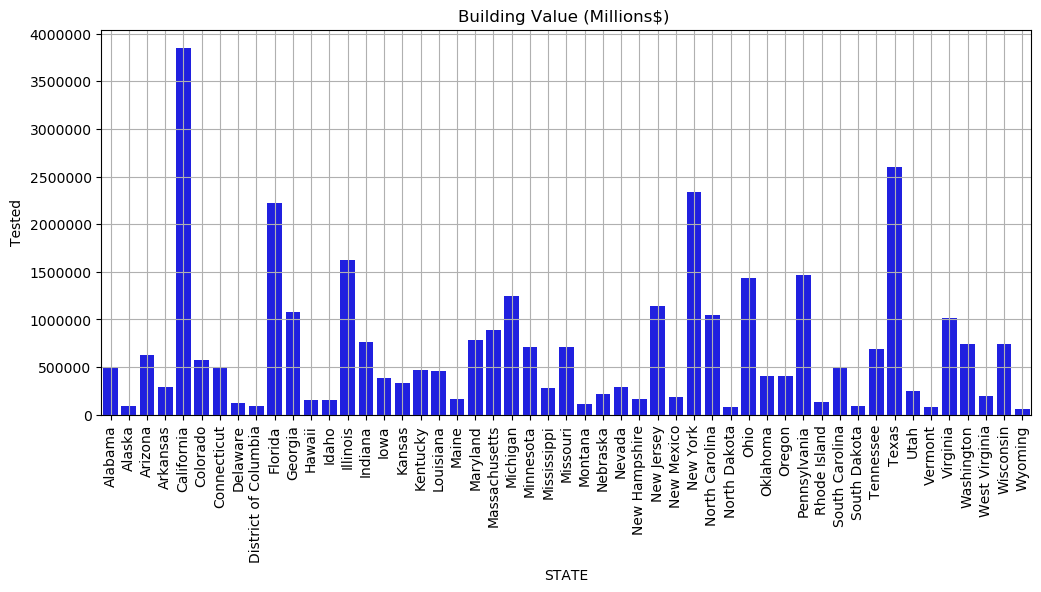

In [49]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x = 'STATE', y = 'BUILDVALUE_by_millions', data = gdf_1, color='blue');
ax.set_title('Building Value (Millions$) ')
ax.set_xticklabels(labels=gdf_1['STATE'], rotation=90)
ax.set_ylabel('Tested')
ax.set_xlabel('STATE')
#Turn off scientific notation
#https://stackoverflow.com/questions/67235388/how-do-i-make-the-numbers-on-the-y-axis-show-values-in-millions-instead-of-in-sc

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.grid()
plt.show()

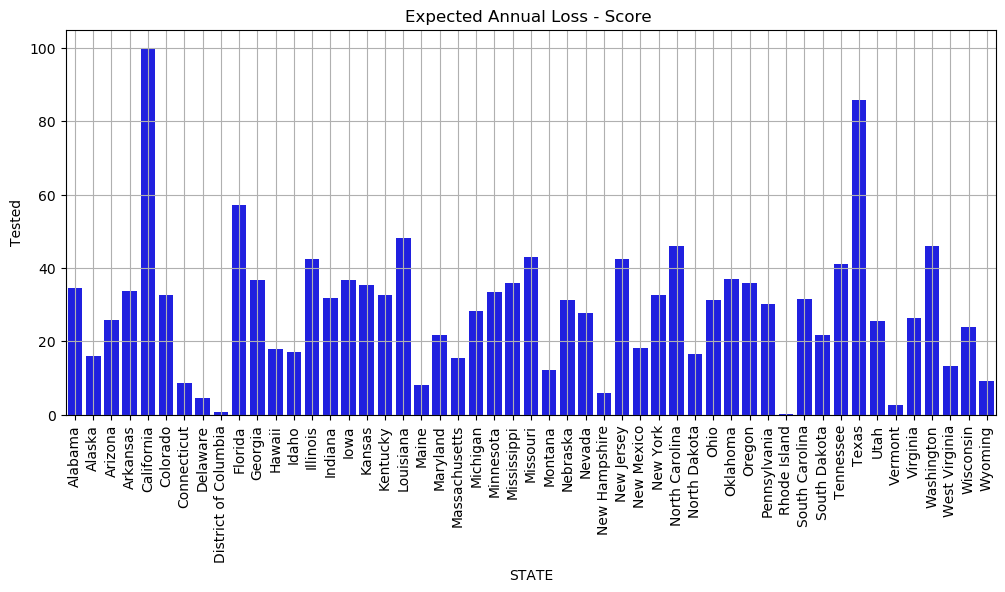

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x = 'STATE', y = 'EAL_SCORE', data = gdf_1, color='blue');
ax.set_title('Expected Annual Loss - Score ')
ax.set_xticklabels(labels=gdf_1['STATE'], rotation=90)
ax.set_ylabel('Tested')
ax.set_xlabel('STATE')
plt.grid()
plt.show()

In [ ]:
gdf_1.plot(column="BUILDVALUE",ax=ax);

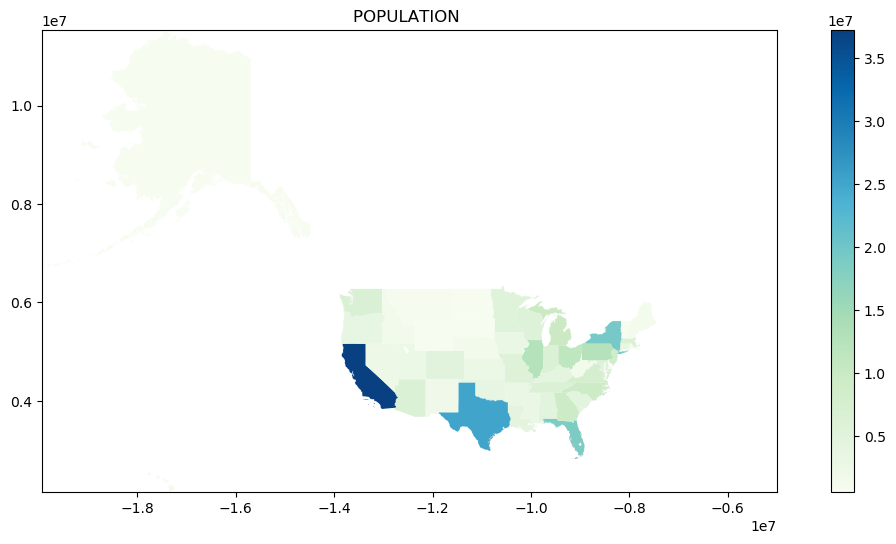

In [40]:

#create x and y min and max to use in the plot boundaries
xmin = -19942590.6658 
ymin = 2144435.3332
xmax = -5000000
ymax = 11537127.3334

# create map with defined extent
fig, ax = plt.subplots(figsize=(14,6))


xlim = (xmin, xmax)
ylim = (ymin, ymax)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.title("POPULATION ")

gdf_1.plot(column = "POPULATION",legend = True, ax = ax,cmap='GnBu')

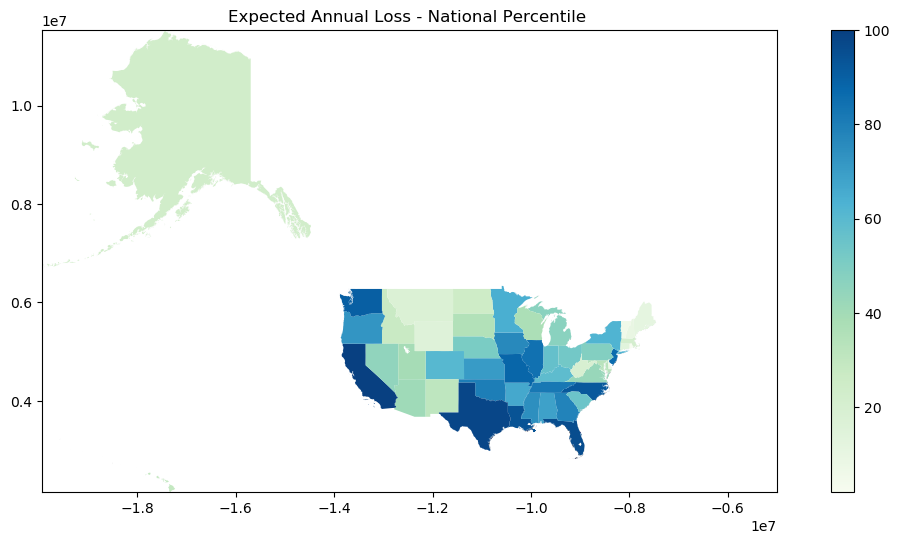

In [33]:

#create x and y min and max to use in the plot boundaries
xmin = -19942590.6658 
ymin = 2144435.3332
xmax = -5000000
ymax = 11537127.3334

# create map with defined extent
fig, ax = plt.subplots(figsize=(14,6))


xlim = (xmin, xmax)
ylim = (ymin, ymax)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.title("Expected Annual Loss - National Percentile ")

gdf_1.plot(column = "EAL_NPCTL",legend = True, ax = ax,cmap='GnBu')

In [ ]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
plt.ticklabel_format(style = 'plain')
gdf_1.axes.get_xaxis().set_visible(False)
gdf_1.axes.get_yaxis().set_visible(False)
gdf_1.plot(column='EAL_SCORE')


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
gdf_1.crs

In [ ]:

 
 #fig, ax = plt.subplots(1, 1)
 #divider = make_axes_locatable(ax)

 #cax = divider.append_axes("right", size="5%", pad=0.1)
 #gdf_1.plot(column='EAL_SCORE', ax=ax, legend=True, cax=cax)
 



<a id='usecases'></a> 
### Use Case Examples

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. 

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


<a id='binder'></a> 
### Create Binder Environment

The last step is to create a Binder environment for your project, so that we don't have to spend time configuring everyone's environment each time we switch between group presentations. Instructions are below:

 - Assemble all of the data needed in your Github repo: Jupyter notebooks, a README file, and any datasets needed (these should be small, if included within the repo). Larger datasets should be stored on a separate server, and access codes included within the Jupyter notebook as discussed above. 
 
 - Create an _environment_ file: this is a text file which contains information on the packages needed in order to execute your code. The filename should be "environment.yml": an example that you can use for the proper syntax is included in this template repo. To determine which packages to include, you'll probably want to start by displaying the packages loaded in your environment: you can use the command `conda list -n [environment_name]` to get a list.
 
 More information on environment files can be found here:
 https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

 - Create Binder. Use http://mybinder.org to create a  URL for your notebook Binder (you will need to enter your GitHub repo URL). You can also add a Launch Binder button directly to your GitHub repo, by including the following in your README.md:

```
launch with myBinder
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/<path to your repo>)
```

<a id='references'></a> 
### References

List relevant references. Here are some additional resources on creating professional, shareable notebooks you may find useful:

1. Notebook sharing guidelines from reproducible-science-curriculum: https://reproducible-science-curriculum.github.io/publication-RR-Jupyter/
2. Guide for developing shareable notebooks by Kevin Coakley, SDSC: https://github.com/kevincoakley/sharing-jupyter-notebooks/raw/master/Jupyter-Notebooks-Sharing-Recommendations.pdf
3. Guide for sharing notebooks by Andrea Zonca, SDSC: https://zonca.dev/2020/09/how-to-share-jupyter-notebooks.html
4. Jupyter Notebook Best Practices: https://towardsdatascience.com/jupyter-notebook-best-practices-f430a6ba8c69
5. Introduction to Jupyter templates nbextension: https://towardsdatascience.com/stop-copy-pasting-notebooks-embrace-jupyter-templates-6bd7b6c00b94  
    5.1. Table of Contents (Toc2) readthedocs: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html  
    5.2. Steps to install toc2: https://stackoverflow.com/questions/23435723/installing-ipython-notebook-table-of-contents
6. Rule A, Birmingham A, Zuniga C, Altintas I, Huang SC, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLOS Computational Biology 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007. Supplementary materials: example notebooks (https://github.com/jupyter-guide/ten-rules-jupyter) and tutorial (https://github.com/ISMB-ECCB-2019-Tutorial-AM4/reproducible-computational-workflows)
7. Languages supported by Jupyter kernels: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
8. EarthCube notebooks presented at EC Annual Meeting 2020: https://www.earthcube.org/notebooks
9. Manage your Python Virtual Environment with Conda: https://towardsdatascience.com/manage-your-python-virtual-environment-with-conda-a0d2934d5195
10. Venv - Creation of Virtual Environments: https://docs.python.org/3/library/venv.html